## KNN

KNN又称为k近邻，是一种基于分类和回归的方法。在给定训练集的情况下，对新的未知数据进行预测

+ 利用KNN做分类时，观察该样本距离最近的k个数据样本点，k个已知样本点中哪个类别的样本点数量大即少数服从多数，未知样本则属于该类别。
+ KNN在做回归时，返回其最近k个样本的平均值。

1. 利用random.randn 产生两组高斯分布的数据，这里我们假设存在两个分类[0, 1]，指定"xy1"属于类别1、"xy2"属于类别0。

2. 坐标值 (-0.8, 1.6) 为未知类别的样本点

### 算法手动实现：
随机选择两组数据集作为训练集，在根据给定样本点利用欧氏距离（还有曼哈顿距离）计算出未知样本的最近k个数据点

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# 未知点
unknown_point = np.array([-0.8,1.6])

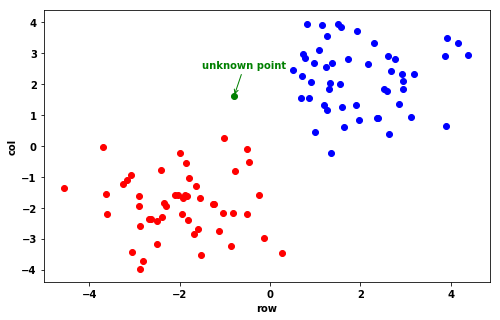

In [30]:
np.random.seed(0)
xy1 = np.random.randn(50, 2) - 2 # randn随机生成的数据是符合正态分布的
xy2 = np.random.randn(50, 2) + 2

x1 = xy1[:,0]
y1 = xy1[:,1]
x2 = xy2[:,0]
y2 = xy2[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='b')
plt.scatter(unknown_point[0],unknown_point[1], c='g')
plt.xlabel('row')
plt.ylabel('col')
plt.annotate('unknown point',xy=[-0.8,1.6], xytext=[-1.5,2.5], arrowprops={"arrowstyle":"->", "color":"g"}, color='g')
plt.show()

3. 利用欧式距离计算距离未知点最近的k个点：

In [31]:
def knn_neighbors(k=1):
    solution = {}
    for xy in xy1:
        solution[(xy[0], xy[1])] = np.sqrt(np.square(xy[0] - unknown_point[0])+ np.square(xy[1] - unknown_point[1]))
    for xy in xy2:
        solution[(xy[0], xy[1])] = np.sqrt(np.square(xy[0] - unknown_point[0])+ np.square(xy[1] - unknown_point[1]))
    return sorted(solution.items(), key=lambda x:x[1])[:k]
neighbors = knn_neighbors(k=5)
neighbors

[((-1.0212620158942607, 0.2408931992014578), 1.37699970067333),
 ((0.6840925894884788, 1.538415395185291), 1.4853698117724092),
 ((0.5087424072943945, 2.4393917012645367), 1.5547942361619753),
 ((0.7071430902765514, 2.267050869349183), 1.648161750820548),
 ((0.8525313475888976, 1.562179955255566), 1.6529640681359195)]

4. 如下图，标记为金色的点为我们找到最近的5个点，并且可以通过图直观的看出，未知点在本次预测中属于0分类：

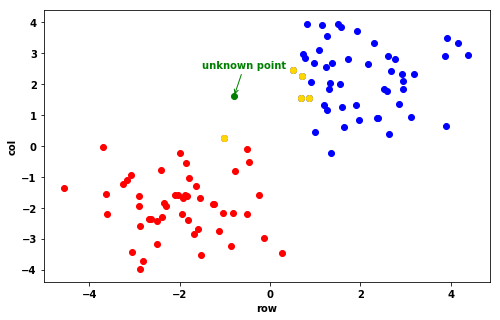

In [32]:
neighbors = np.array([list(n[0]) for n in neighbors])

plt.figure(figsize=(8,5))
plt.scatter(x1, y1, c='r')
plt.scatter(x2, y2, c='b')
plt.scatter(unknown_point[0],unknown_point[1], c='g')
plt.xlabel('row')
plt.ylabel('col')
plt.annotate('unknown point',xy=[-0.8,1.6], xytext=[-1.5,2.5], arrowprops={"arrowstyle":"->", "color":"g"}, color='g')
plt.scatter(neighbors[:,0], neighbors[:,1], c='gold')
plt.show()

通过sklean封装好的knn算法计算以上未知样本的类别，并和手动实现的作对比

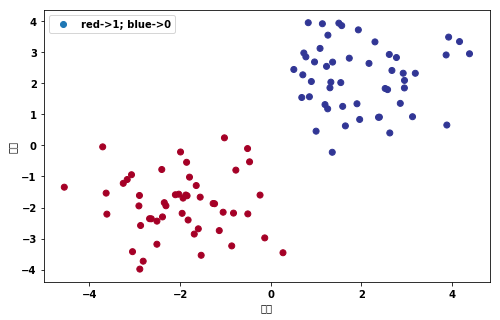

In [36]:
from sklearn import neighbors

zeros = np.zeros(50)
ones = np.ones(50)

xy1_ones = np.c_[xy1, ones]
xy2_zeros = np.c_[xy2, zeros]

xy = np.append(xy1_ones, xy2_zeros, axis=0)

plt.figure(figsize=(8,5))
plt.scatter(xy[:,0], xy[:,1], c=xy[:,2], cmap='RdYlBu_r')
plt.xlabel('横轴')
plt.ylabel('纵轴')
plt.legend(loc=2, labels=['red->1; blue->0'])
plt.show()

2. 利用sklearn.neighbors训练knn模型：

In [37]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xy[:,:2],xy[:,2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

3. 利用训练好的模型预测样本点，很显然执行结果和上面的是一致的：

In [38]:
knn_model.predict(np.array([[-0.8, 1.6]]))

array([0.])